# Capstone Project - The Battle of Neighbourhoods

## Finding the best place to live in London as a student

## Description of the Business problem

In London, there are numerous boroughs. The city is famous for its many touristic spots and is one of the most visited cities on the planet. In addition to tourists, many students come to London in order to study at university. As well as this, many people come for short term stays for e.g. internships, as well as for graduate programs. Therefore, finding a good place to stay is very important, somewhere that has local access to shops and supermarkets, as well as restaurants, bars and a number of other facilities.

HS is moving to London in order to study at University College London. In addition to university life, HS also wants to get a feel of the city's culture, food etc. He's looking to live in a neighbourhood that is culturally vibrant but not too touristy, as he feels that he can visit tourist sites in his spare time, therefore the proximity of tourist attractions is not something that matters to him. 

From the perspective of students, many factors are involved when searching for the best accommodation, which includes distance and rent. However, this project will focus on the general atmosphere of different areas of London as well as safety.

The research carried out is expected to be of benefit to international students looking to live in London, because despite the opportunity to explore the local culture, they would very likely want to feel at home at the same time.

## Data Acquisition

In the project, I will be using the following datasets to produce an outcome - Borough Level Crime, List of London boroughs and Foursquare API. 

1: Borough Level Crime

    
   * London crime records within boroughs within the last 24 months
   * Source: London Datastore
   * https://data.london.gov.uk/dataset/recorded_crime_summary


In [1]:
import pandas as pd
import numpy as np

In [2]:
# First, we will read the data
crime = pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
crime.head()

,MajorText,MinorText,LookUp_BoroughName,201807,201808,201809,201810,201811,201812,201901,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,5,3,8,5,1,5,...,6,9,8,6,4,5,6,2,2,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,127,101,107,132,105,88,97,...,109,109,97,121,97,103,107,80,86,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,30,18,33,32,39,33,45,...,37,30,30,25,31,17,28,29,16,16
3,Burglary,Burglary - Residential,Barking and Dagenham,94,84,99,94,106,164,114,...,80,97,114,130,116,123,97,57,41,63
4,Drug Offences,Drug Trafficking,Barking and Dagenham,8,7,10,7,7,4,5,...,7,8,13,3,14,5,6,12,12,7


In [3]:
# We will obtain the shape of the data to get a better understanding of what we're dealing with
crime.shape

(1569, 27)

In [4]:
# We will obtain the names of each of the boroughs
crime['LookUp_BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [5]:
# We will create a column that displays the sum of incidents that took place in the last 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,LookUp_BoroughName,Sum,201807,201808,201809,201810,201811,201812,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
0,Arson and Criminal Damage,Arson,Barking and Dagenham,119,6,5,3,8,5,1,...,6,9,8,6,4,5,6,2,2,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2687,127,101,107,132,105,88,...,109,109,97,121,97,103,107,80,86,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,683,30,18,33,32,39,33,...,37,30,30,25,31,17,28,29,16,16
3,Burglary,Burglary - Residential,Barking and Dagenham,2323,94,84,99,94,106,164,...,80,97,114,130,116,123,97,57,41,63
4,Drug Offences,Drug Trafficking,Barking and Dagenham,181,8,7,10,7,7,4,...,7,8,13,3,14,5,6,12,12,7


In [6]:
# We will delete any unnecessary columns
crime.drop(crime.columns[0:2], axis=1, inplace=True)
crime.drop(crime.columns[2:26], axis=1, inplace=True)
crime.head()

,LookUp_BoroughName,Sum
0,Barking and Dagenham,119
1,Barking and Dagenham,2687
2,Barking and Dagenham,683
3,Barking and Dagenham,2323
4,Barking and Dagenham,181


In [7]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['LookUp_BoroughName'], as_index=False).sum()
crime

,LookUp_BoroughName,Sum
0,Barking and Dagenham,38788
1,Barnet,59213
2,Bexley,33692
3,Brent,59921
4,Bromley,47612
5,Camden,72764
6,Croydon,66117
7,Ealing,60522
8,Enfield,58648
9,Greenwich,54851


In [8]:
# Change the sum into monthly average
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[0]:'BoroughName',crime.columns[1]:'MonthlyAverage'}, inplace=True)
crime

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1616.166667
1,Barnet,2467.208333
2,Bexley,1403.833333
3,Brent,2496.708333
4,Bromley,1983.833333
5,Camden,3031.833333
6,Croydon,2754.875000
7,Ealing,2521.750000
8,Enfield,2443.666667
9,Greenwich,2285.458333


In [9]:
# Explore the boroughs with most incidents?
crime.sort_values(by='MonthlyAverage', ascending=False).head()

,BoroughName,MonthlyAverage
32,Westminster,5920.666667
27,Southwark,3071.916667
5,Camden,3031.833333
24,Newham,2924.250000
20,Lambeth,2862.541667


In [10]:
# Explore the boroughs with least incidents?
crime.sort_values(by='MonthlyAverage', ascending=True).head()

,BoroughName,MonthlyAverage
22,London Heathrow and London City Airports,260.250000
19,Kingston upon Thames,1054.208333
26,Richmond upon Thames,1058.375000
28,Sutton,1120.333333
23,Merton,1171.416667


2: List of London boroughs

 * Information on boroughs as well as their population and coordinates
 - The population can be used to find out the ratio of reported crime to the polulation, in order to give a better comparison
 - The coordinates can be used to obtain data on neighbourhoods from Foursquare
 * Source: Wikipedia
 *  https://en.wikipedia.org/wiki/List_of_London_boroughs


In [11]:
!pip install beautifulsoup4
!pip install lxml
import requests
import lxml
from bs4 import BeautifulSoup

     |████████████████████████████████| 122kB 6.8MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 6.7MB/s eta 0:00:01


In [12]:
# We will extract the data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c5f528e4-fc99-43a1-89af-d7c61ce681f0","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinat

In [13]:
# We will extract the key columns from the dataset in order to create a new table
BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [14]:
# We will create a dctionary of key items
dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
borlist = pd.DataFrame.from_dict(dict)
borlist.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [15]:
# Stripping all unwanted texts
borlist['BoroughName'] = borlist['BoroughName'].map(lambda x: x.rstrip(']'))
borlist['BoroughName'] = borlist['BoroughName'].map(lambda x: x.rstrip('1234567890.'))
borlist['BoroughName'] = borlist['BoroughName'].str.replace('note','')
borlist['BoroughName'] = borlist['BoroughName'].map(lambda x: x.rstrip(' ['))
borlist.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [16]:
# Cleaning the coordinates
borlist[['Coordinates1','Coordinates2','Coordinates3']] = borlist['Coordinates'].str.split('/',expand=True)
borlist.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [17]:
# Dropping the first 3 coordinates columns and splitting the last coordinates column into latitude and longitude
borlist.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
borlist[['Latitude','Longitude']] = borlist['Coordinates3'].str.split(';',expand=True)
borlist.head()

,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [18]:
# Dropping the Coordinates3 column and stripping all unnecessary text from the Latitude, Longitude and Population columns
borlist.drop(labels=['Coordinates3'], axis=1,inplace = True)
borlist['Latitude'] = borlist['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
borlist['Latitude'] = borlist['Latitude'].map(lambda x: x.lstrip())
borlist['Longitude'] = borlist['Longitude'].map(lambda x: x.rstrip(')'))
borlist['Longitude'] = borlist['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
borlist['Longitude'] = borlist['Longitude'].map(lambda x: x.rstrip(' ('))
borlist['Longitude'] = borlist['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
borlist['Longitude'] = borlist['Longitude'].map(lambda x: x.lstrip())
borlist['Population'] = borlist['Population'].str.replace(',','')
borlist.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [19]:
# Obtaining info on the boroughs
borlist['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

3: Foursquare API

 * Will provide a list of the 50 most popular places in each neighbourhood
 * Source: Foursquare
 * Url: https://api.foursquare.com

In [20]:
# Defining the Foursquare credentials and version
CLIENT_ID = 'GKTDCLUUVFH3JKICH3AWCUPEN2NOTEC3SXBNYUHY3ZFLULDS' # your Foursquare ID
CLIENT_SECRET = 'DLVAFEIBQZ4ZTTBDMPGH2ZC5LAI5SDA2G1JMIJSYTTR3YIHJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GKTDCLUUVFH3JKICH3AWCUPEN2NOTEC3SXBNYUHY3ZFLULDS
CLIENT_SECRET:DLVAFEIBQZ4ZTTBDMPGH2ZC5LAI5SDA2G1JMIJSYTTR3YIHJ


In [21]:
# Obtaining the Foursquare credentials
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
# Obtaining the top 50 venues within a 500m radius of the centre of every borough
LIMIT = 50
venues = getNearbyVenues(names=borlist['BoroughName'],
                                   latitudes=borlist['Latitude'],
                                   longitudes=borlist['Longitude'])
                                  

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [23]:
# Obtaining the shape of the dataset
print(venues.shape)
venues.head()

(1140, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


## Methodology

In this section, we will be exploring the data more thoroughly. We will then perform cluster analysis in order to classify the boroughs into different levels of preference

1: Exploratory analysis

In [24]:
# Reviewing the data
crime.head()

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1616.166667
1,Barnet,2467.208333
2,Bexley,1403.833333
3,Brent,2496.708333
4,Bromley,1983.833333


In [25]:
borlist.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [26]:
venues.head()

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [27]:
import matplotlib.pyplot as plt

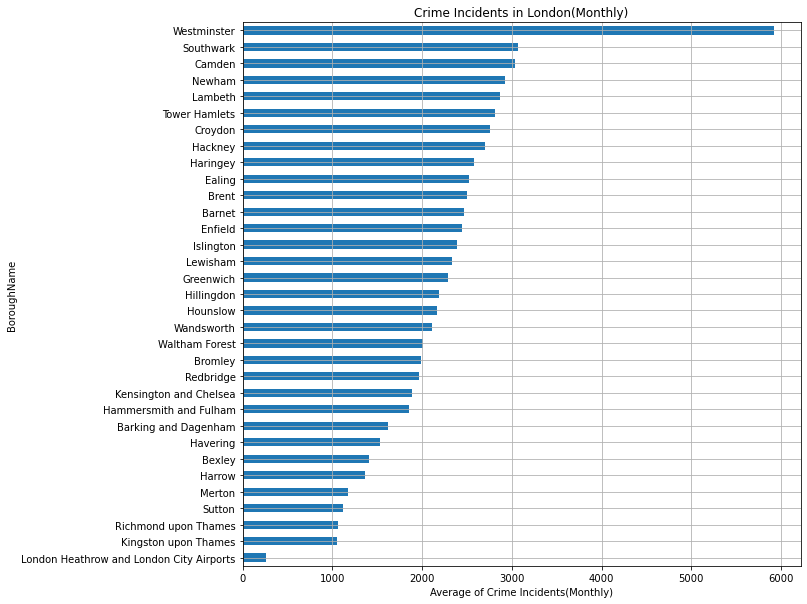

In [28]:
#Visualising the crime data
crime.set_index('BoroughName')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Average of Crime Incidents(Monthly)')
plt.title('Crime Incidents in London(Monthly)')
plt.show()

In [29]:
# We are going to drop Heathrow Airport data as it's not included in the population data
crime.drop([22], inplace=True)

In [30]:
# We will combine the crime and borough list data
df = pd.merge(crime, borlist, how='outer', on='BoroughName')
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude
0,Barking and Dagenham,1616.166667,194352,51.5607,0.1557
1,Barnet,2467.208333,369088,51.6252,-0.1517
2,Bexley,1403.833333,236687,51.4549,0.1505
3,Brent,2496.708333,317264,51.5588,-0.2817
4,Bromley,1983.833333,317899,51.4039,0.0198


In [31]:
#Checking the data type of each column
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population         object
Latitude           object
Longitude          object
dtype: object

In [32]:
#Changing the data type of the Population, Latiude and Lingitude columns
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population          int64
Latitude          float64
Longitude         float64
dtype: object

In [33]:
#Creating a cloumn that shows the number of crimes committed monthly per 1000
df['Population'].astype(float)
df['CrimePer1000'] = df['MonthlyAverage'] / df['Population'] * 1000
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimePer1000
0,Barking and Dagenham,1616.166667,194352,51.5607,0.1557,8.315668
1,Barnet,2467.208333,369088,51.6252,-0.1517,6.684607
2,Bexley,1403.833333,236687,51.4549,0.1505,5.931181
3,Brent,2496.708333,317264,51.5588,-0.2817,7.869498
4,Bromley,1983.833333,317899,51.4039,0.0198,6.240452


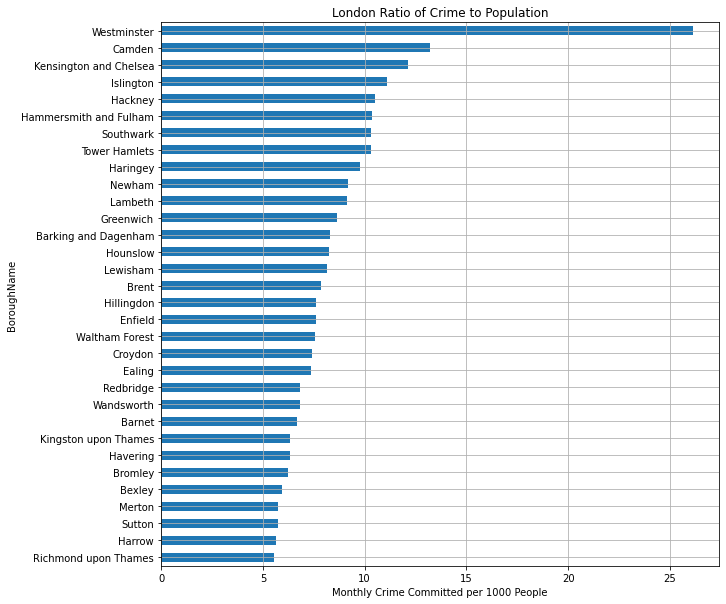

In [34]:
#Creating a visual representation of the number of crimes committed monthly per 1000 people
df.set_index('BoroughName')['CrimePer1000'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Crime Committed per 1000 People')
plt.title('London Ratio of Crime to Population')
plt.show()

In [35]:
!pip install geopy
import folium
from geopy.geocoders import Nominatim

     |████████████████████████████████| 112kB 8.9MB/s eta 0:00:01


In [36]:
#Obtaining the coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [37]:
# Creating a map of London using the folium package
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

2: Cluster Analysis

Here,using Foursquare data, we will cary out K-Means clustering in order to group the boroughs based on what facilities they have available

In [38]:
print('There are {} unique categories.'.format(len(venues['Venue Category'].unique())))

There are 183 unique categories.


In [39]:
# Performing One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [40]:
# Adding BoroughName back to the dataframe
borough = venues['BoroughName']
onehot.insert(0, 'BoroughName', borough)
onehot.head()

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Grouping the rows by borough and finding the mean of the frequency of each venue category
grouped = onehot.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
1,Barnet,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
2,Bexley,0.00000,0.000000,0.000000,0.000000,0.037037,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.037037,0.00000,0.037037,0.00,0.00,0.00,0.00
3,Brent,0.00000,0.000000,0.000000,0.000000,0.040000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
4,Bromley,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
5,Camden,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.020000,0.02,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
6,Croydon,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00
7,Ealing,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.04000,0.000000,0.02,0.00,0.00,0.00
8,Enfield,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.020000,0.00,0.000000,0.040000,0.00000,0.000000,0.00,0.00,0.02,0.00
9,Greenwich,0.02439,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.000000,0.00,0.000000,0.000000,0.02439,0.024390,0.00,0.00,0.00,0.00


In [42]:
# Finding the top 5venues in each borough
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0  Gym / Fitness Center  0.14
1                  Pool  0.14
2           Bus Station  0.14
3           Supermarket  0.14
4           Golf Course  0.14


----Barnet----
                        venue  freq
0         Rental Car Location  0.25
1  Construction & Landscaping  0.25
2                    Bus Stop  0.25
3                        Café  0.25
4          African Restaurant  0.00


----Bexley----
                  venue  freq
0                   Pub  0.11
1        Clothing Store  0.11
2           Coffee Shop  0.11
3           Supermarket  0.07
4  Fast Food Restaurant  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2       Clothing Store  0.06
3  Sporting Goods Shop  0.06
4        Grocery Store  0.06


----Bromley----
                  venue  freq
0        Clothing Store  0.13
1           Coffee Shop  0.13
2  Gym / Fitness Center  0.05
3           Pizza Place  0.05
4  

In [43]:
# Putting the data into a pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# creating columns according to the number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Golf Course,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Martial Arts Dojo,Dumpling Restaurant,Fast Food Restaurant,Farmers Market
1,Barnet,Construction & Landscaping,Rental Car Location,Bus Stop,Café,Duty-free Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Event Space
2,Bexley,Clothing Store,Coffee Shop,Pub,Supermarket,Pharmacy,Fast Food Restaurant,Bakery,Sandwich Place,Furniture / Home Store,Hotel
3,Brent,Coffee Shop,Hotel,Sporting Goods Shop,Clothing Store,Grocery Store,American Restaurant,Sandwich Place,Bar,Plaza,Roof Deck
4,Bromley,Coffee Shop,Clothing Store,Pizza Place,Gym / Fitness Center,Burger Joint,Bar,Burrito Place,Café,Sandwich Place,Chocolate Shop


In [44]:
#Performing K Means clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [45]:
kclusters = 5
ldn_cluster = grouped.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ldn_cluster)

kmeans.labels_[0:10]

array([2, 1, 2, 3, 2, 3, 0, 2, 2, 2], dtype=int32)

In [46]:
#Adding the clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#Merging venues_sorted with df to add the latitude &longitude for each neighborhood
ldn_merged = df
ldn_merged = ldn_merged.join(venues_sorted.set_index('BoroughName'), on='BoroughName')

ldn_merged.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimePer1000,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,1616.166667,194352,51.5607,0.1557,8.315668,2,Golf Course,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Martial Arts Dojo,Dumpling Restaurant,Fast Food Restaurant,Farmers Market
1,Barnet,2467.208333,369088,51.6252,-0.1517,6.684607,1,Construction & Landscaping,Rental Car Location,Bus Stop,Café,Duty-free Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Event Space
2,Bexley,1403.833333,236687,51.4549,0.1505,5.931181,2,Clothing Store,Coffee Shop,Pub,Supermarket,Pharmacy,Fast Food Restaurant,Bakery,Sandwich Place,Furniture / Home Store,Hotel
3,Brent,2496.708333,317264,51.5588,-0.2817,7.869498,3,Coffee Shop,Hotel,Sporting Goods Shop,Clothing Store,Grocery Store,American Restaurant,Sandwich Place,Bar,Plaza,Roof Deck
4,Bromley,1983.833333,317899,51.4039,0.0198,6.240452,2,Coffee Shop,Clothing Store,Pizza Place,Gym / Fitness Center,Burger Joint,Bar,Burrito Place,Café,Sandwich Place,Chocolate Shop


In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ldn_merged['Latitude'], ldn_merged['Longitude'], ldn_merged['BoroughName'], ldn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Looking at the clusters in further detail and naming them according to their individual characteristics

In [48]:
# Cluster 0: Healthy area
ldn_merged.loc[ldn_merged['Cluster Labels'] == 0, ldn_merged.columns[[0] + list(range(5, ldn_merged.shape[1]))]]

,BoroughName,CrimePer1000,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Croydon,7.390638,0,Pub,Coffee Shop,Portuguese Restaurant,Asian Restaurant,Sushi Restaurant,Korean Restaurant,Bookstore,Gaming Cafe,Breakfast Spot,Spanish Restaurant
10,Hackney,10.513516,0,Pub,Coffee Shop,Brewery,Bakery,Café,Clothing Store,Modern European Restaurant,Grocery Store,Cocktail Bar,Vegetarian / Vegan Restaurant
11,Hammersmith and Fulham,10.371370,0,Pub,Indian Restaurant,Italian Restaurant,Café,Gastropub,Vietnamese Restaurant,Japanese Restaurant,Clothing Store,Boarding House,Furniture / Home Store
17,Islington,11.083252,0,Pub,Bakery,Mediterranean Restaurant,Furniture / Home Store,Burger Joint,Theater,French Restaurant,Boutique,Ice Cream Shop,Latin American Restaurant
19,Kingston upon Thames,6.320459,0,Café,Coffee Shop,Burger Joint,Pub,Department Store,Sushi Restaurant,Thai Restaurant,Furniture / Home Store,French Restaurant,Burrito Place
20,Lambeth,9.109354,0,Market,Caribbean Restaurant,Pub,Restaurant,Pizza Place,Cocktail Bar,Indian Restaurant,Nightclub,Beer Bar,BBQ Joint
25,Richmond upon Thames,5.530661,0,Pub,Coffee Shop,Italian Restaurant,Bus Stop,Indian Restaurant,Pharmacy,Grocery Store,Hotel,Bookstore,Garden
29,Waltham Forest,7.553227,0,Coffee Shop,Pub,Gym / Fitness Center,Concert Hall,Pool,Social Club,Beer Store,Tea Room,Pizza Place,Art Gallery


In [49]:
# Cluster 1: Lively area (Pubs, Restaurants)
ldn_merged.loc[ldn_merged['Cluster Labels'] == 1, ldn_merged.columns[[0] + list(range(5, ldn_merged.shape[1]))]]

,BoroughName,CrimePer1000,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,6.684607,1,Construction & Landscaping,Rental Car Location,Bus Stop,Café,Duty-free Shop,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Event Space


In [50]:
# Cluster 2: Shopping area (Coffee shops, Clothing stores)
ldn_merged.loc[ldn_merged['Cluster Labels'] == 2, ldn_merged.columns[[0] + list(range(5, ldn_merged.shape[1]))]]

,BoroughName,CrimePer1000,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,8.315668,2,Golf Course,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Martial Arts Dojo,Dumpling Restaurant,Fast Food Restaurant,Farmers Market
2,Bexley,5.931181,2,Clothing Store,Coffee Shop,Pub,Supermarket,Pharmacy,Fast Food Restaurant,Bakery,Sandwich Place,Furniture / Home Store,Hotel
4,Bromley,6.240452,2,Coffee Shop,Clothing Store,Pizza Place,Gym / Fitness Center,Burger Joint,Bar,Burrito Place,Café,Sandwich Place,Chocolate Shop
7,Ealing,7.362903,2,Coffee Shop,Italian Restaurant,Hotel,Clothing Store,Pizza Place,Burger Joint,Park,Vietnamese Restaurant,Pub,Portuguese Restaurant
8,Enfield,7.623974,2,Clothing Store,Coffee Shop,Pub,Supermarket,Bookstore,Shopping Mall,Café,Optical Shop,Department Store,Video Game Store
9,Greenwich,8.656777,2,Pub,Fast Food Restaurant,Coffee Shop,Supermarket,Clothing Store,Grocery Store,Hotel,Plaza,Sandwich Place,Pharmacy
12,Haringey,9.787441,2,Park,Fast Food Restaurant,Portuguese Restaurant,Supermarket,Light Rail Station,Bus Stop,Bar,Bakery,Pub,Grocery Store
13,Harrow,5.625134,2,Indian Restaurant,Thai Restaurant,Supermarket,Grocery Store,Coffee Shop,Indie Movie Theater,Creperie,Film Studio,Fast Food Restaurant,Farmers Market
14,Havering,6.311791,2,Clothing Store,Coffee Shop,Shopping Mall,Café,Fast Food Restaurant,Bookstore,Supermarket,Bakery,Hotel,Pub
15,Hillingdon,7.624928,2,Coffee Shop,Clothing Store,Pharmacy,Fast Food Restaurant,Italian Restaurant,Pizza Place,Burger Joint,Toy / Game Store,Bookstore,Pub


In [51]:
# Cluster 3: Market area
ldn_merged.loc[ldn_merged['Cluster Labels'] == 3, ldn_merged.columns[[0] + list(range(5, ldn_merged.shape[1]))]]

,BoroughName,CrimePer1000,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,7.869498,3,Coffee Shop,Hotel,Sporting Goods Shop,Clothing Store,Grocery Store,American Restaurant,Sandwich Place,Bar,Plaza,Roof Deck
5,Camden,13.198009,3,Café,Hotel,Coffee Shop,Train Station,Garden,Burger Joint,Bakery,Italian Restaurant,Breakfast Spot,Pizza Place
23,Newham,9.189195,3,Hotel,Sandwich Place,Airport,Airport Lounge,Airport Service,Currency Exchange,Pharmacy,Rafting,Duty-free Shop,Light Rail Station
26,Southwark,10.292419,3,Coffee Shop,Hotel,Pub,Thai Restaurant,Hotel Bar,Art Gallery,Pizza Place,Cocktail Bar,English Restaurant,Theater
28,Tower Hamlets,10.288181,3,Sandwich Place,Hotel,Italian Restaurant,Light Rail Station,Coffee Shop,Steakhouse,Chinese Restaurant,Café,Grocery Store,Gym / Fitness Center
31,Westminster,26.100514,3,Hotel,Coffee Shop,Theater,Sandwich Place,Sushi Restaurant,Hotel Bar,Juice Bar,Sporting Goods Shop,Bistro,Street Food Gathering


In [52]:
# Cluster 4: Traveller area
ldn_merged.loc[ldn_merged['Cluster Labels'] == 4, ldn_merged.columns[[0] + list(range(5, ldn_merged.shape[1]))]]

,BoroughName,CrimePer1000,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,8.259275,4,Pizza Place,Metro Station,Park,Café,Bed & Breakfast,Yoga Studio,Electronics Store,Fish Market,Film Studio,Fast Food Restaurant


## Results

Now, we will look back at the analysis carried out before coming to a conclusion on the best area to live as an international student.

Like I mentioned at the start, the key factors that would bee looked at were safety and general atomsphere.

#### 1: Safety

Using the crime rate that we calculated, we can try and determine the safety rating of each borough

In [53]:
crimeper1000 = ldn_merged['CrimePer1000']
ldn_merged.drop(['CrimePer1000'], inplace=True, axis=1)
ldn_merged.insert(1, 'CrimePer1000', crimeper1000)
ldn_merged.sort_values(by='CrimePer1000', ascending = False)

,BoroughName,CrimePer1000,MonthlyAverage,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Westminster,26.100514,5920.666667,226841,51.4973,-0.1372,3,Hotel,Coffee Shop,Theater,Sandwich Place,Sushi Restaurant,Hotel Bar,Juice Bar,Sporting Goods Shop,Bistro,Street Food Gathering
5,Camden,13.198009,3031.833333,229719,51.5290,-0.1255,3,Café,Hotel,Coffee Shop,Train Station,Garden,Burger Joint,Bakery,Italian Restaurant,Breakfast Spot,Pizza Place
18,Kensington and Chelsea,12.148069,1890.166667,155594,51.5020,-0.1947,2,Juice Bar,Café,Restaurant,Gym / Fitness Center,Burger Joint,Italian Restaurant,Bakery,Clothing Store,Modern European Restaurant,Museum
17,Islington,11.083252,2390.291667,215667,51.5416,-0.1022,0,Pub,Bakery,Mediterranean Restaurant,Furniture / Home Store,Burger Joint,Theater,French Restaurant,Boutique,Ice Cream Shop,Latin American Restaurant
10,Hackney,10.513516,2705.958333,257379,51.5450,-0.0553,0,Pub,Coffee Shop,Brewery,Bakery,Café,Clothing Store,Modern European Restaurant,Grocery Store,Cocktail Bar,Vegetarian / Vegan Restaurant
11,Hammersmith and Fulham,10.371370,1853.208333,178685,51.4927,-0.2339,0,Pub,Indian Restaurant,Italian Restaurant,Café,Gastropub,Vietnamese Restaurant,Japanese Restaurant,Clothing Store,Boarding House,Furniture / Home Store
26,Southwark,10.292419,3071.916667,298464,51.5035,-0.0804,3,Coffee Shop,Hotel,Pub,Thai Restaurant,Hotel Bar,Art Gallery,Pizza Place,Cocktail Bar,English Restaurant,Theater
28,Tower Hamlets,10.288181,2807.541667,272890,51.5099,-0.0059,3,Sandwich Place,Hotel,Italian Restaurant,Light Rail Station,Coffee Shop,Steakhouse,Chinese Restaurant,Café,Grocery Store,Gym / Fitness Center
12,Haringey,9.787441,2577.875000,263386,51.6000,-0.1119,2,Park,Fast Food Restaurant,Portuguese Restaurant,Supermarket,Light Rail Station,Bus Stop,Bar,Bakery,Pub,Grocery Store
23,Newham,9.189195,2924.250000,318227,51.5077,0.0469,3,Hotel,Sandwich Place,Airport,Airport Lounge,Airport Service,Currency Exchange,Pharmacy,Rafting,Duty-free Shop,Light Rail Station


2: General Atmosphere

Using the K-Cluster analysis that we performed earlier, we will give each cluster a name based on the characteristics associated with its most popular venues

From what I have gathered from my research, Cluster 0 is the 'Healthy Area', consisting of many gyms, swimming pools and parks.

In [54]:
ldn_merged.loc[ldn_merged['Cluster Labels'] == 0].BoroughName.unique()

array(['Croydon', 'Hackney', 'Hammersmith and Fulham', 'Islington',
       'Kingston upon Thames', 'Lambeth', 'Richmond upon Thames',
       'Waltham Forest'], dtype=object)

Cluster 1 is the 'Lively Area', consisting of may restaurants and pubs

In [55]:
ldn_merged.loc[ldn_merged['Cluster Labels'] == 1].BoroughName.unique()

array(['Barnet'], dtype=object)

Cluster 2 is the 'Shopping area', consisting of clothing stores and coffee shops

In [56]:
ldn_merged.loc[ldn_merged['Cluster Labels'] == 2].BoroughName.unique()

array(['Barking and Dagenham', 'Bexley', 'Bromley', 'Ealing', 'Enfield',
       'Greenwich', 'Haringey', 'Harrow', 'Havering', 'Hillingdon',
       'Kensington and Chelsea', 'Lewisham', 'Merton', 'Redbridge',
       'Sutton', 'Wandsworth'], dtype=object)

Cluster 3 is the 'Market Area', which has many markets

In [57]:
ldn_merged.loc[ldn_merged['Cluster Labels'] == 3].BoroughName.unique()

array(['Brent', 'Camden', 'Newham', 'Southwark', 'Tower Hamlets',
       'Westminster'], dtype=object)

Cluster 4 is the 'Traveler Area', which has a metro station and bed & breakfast

In [58]:
ldn_merged.loc[ldn_merged['Cluster Labels'] == 4].BoroughName.unique()

array(['Hounslow'], dtype=object)

As mentioned at the beginning, HS is looking to live somewhere that is culturally vibrant but not too touristy. Therefore, in terms of selecting the best area to live in, the order that I would give is Shopping Area, Lively Area, Market Area, Healthy Area and Traveler Area

3: Weighted Score

Finally, we'll calculate the scores of each borough

In [59]:
score = ldn_merged[['BoroughName','CrimePer1000','Cluster Labels']].copy()
score.head()

,BoroughName,CrimePer1000,Cluster Labels
0,Barking and Dagenham,8.315668,2
1,Barnet,6.684607,1
2,Bexley,5.931181,2
3,Brent,7.869498,3
4,Bromley,6.240452,2


In [60]:
score['Safety'] = (score['CrimePer1000']-score['CrimePer1000'].min())/(score['CrimePer1000'].max()-score['CrimePer1000'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score.head()

,BoroughName,CrimePer1000,Cluster Labels,Safety
0,Barking and Dagenham,8.315668,2,0.864607
1,Barnet,6.684607,1,0.943901
2,Bexley,5.931181,2,0.980529
3,Brent,7.869498,3,0.886298
4,Bromley,6.240452,2,0.965494


In [61]:
score['Atmosphere'] = 0
score.head()

,BoroughName,CrimePer1000,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.315668,2,0.864607,0
1,Barnet,6.684607,1,0.943901,0
2,Bexley,5.931181,2,0.980529,0
3,Brent,7.869498,3,0.886298,0
4,Bromley,6.240452,2,0.965494,0


In [62]:
for i in range(32):
    if score.iloc[i,2] == 2:
        score.iloc[i,4] = 1
    elif score.iloc[i,2] == 1:
        score.iloc[i,4] = 0.9
    elif score.iloc[i,2] == 0:
        score.iloc[i,2] = 0.8
    elif score.iloc[i,2] == 3:
        score.iloc[i,4] = 0.7
    else:
        score.iloc[i,2] = 0.6
                
score.head()

,BoroughName,CrimePer1000,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.315668,2.0,0.864607,1.0
1,Barnet,6.684607,1.0,0.943901,0.9
2,Bexley,5.931181,2.0,0.980529,1.0
3,Brent,7.869498,3.0,0.886298,0.7
4,Bromley,6.240452,2.0,0.965494,1.0


In [63]:
score.drop(['CrimePer1000'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score['Score'] = score['Safety'] + score['Atmosphere']
score.sort_values(by='Score', ascending = False)

,BoroughName,Safety,Atmosphere,Score
13,Harrow,0.995407,1.0,1.995407
27,Sutton,0.990868,1.0,1.990868
22,Merton,0.988647,1.0,1.988647
2,Bexley,0.980529,1.0,1.980529
4,Bromley,0.965494,1.0,1.965494
14,Havering,0.962026,1.0,1.962026
30,Wandsworth,0.937745,1.0,1.937745
24,Redbridge,0.937230,1.0,1.937230
7,Ealing,0.910926,1.0,1.910926
8,Enfield,0.898234,1.0,1.898234


## Conclusion

From the analysis, it can be said that the 5 boroughs below are the best places to live as a student who wants to get a feel of the city's culture, food etc. This is based on the general atmosphere of each area and safety. These 5 boroughs all belong the 'Shopping Area' cluster, with many coffee shops, clothing stores and  restaurants which serve many different cuisines. Therefore, determining the best borough out of them in this context is determined by the safety score

In [64]:
ldn_top5 = df.iloc[[25,13,27,22,2],:]
ldn_top5

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimePer1000
25,Richmond upon Thames,1058.375000,191365,51.4479,-0.3260,5.530661
13,Harrow,1369.000000,243372,51.5898,-0.3346,5.625134
27,Sutton,1120.333333,195914,51.3618,-0.1945,5.718496
22,Merton,1171.416667,203223,51.4014,-0.1958,5.764193
2,Bexley,1403.833333,236687,51.4549,0.1505,5.931181


In [65]:
# Creating a map of London using the Folium package
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(ldn_top5['Latitude'], ldn_top5['Longitude'], ldn_top5['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

To see the maps, have a look on my Github repository at 'London K Clusters' and 'London 5 boroughs'